In [ ]:
from dcp.dragonfly import utility

In [ ]:
utility.header("data/2024-06-03/AL694M-21061001_1_light.fits")

In [ ]:
df = utility.summarize_directory(
    "data/2024-06-03", 
    keys=['DATE', 'EXPTIME', 'FWHM', 'FOCUSPOS', 'CCD-TEMP', 'NAXIS1', 'NAXIS2','IMAGETYP'])

df = df[(df['IMAGETYP'] == 'light') & (df['FWHM'] < 3.0)]
df

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates

from datetime import datetime

def plot_dataframe(df, xcolumn:str = 'DATE', ycolumn:str = 'FWHM', is_date:bool = True, 
                   omit_day:bool = True, rotation:float=0):
    x = df[xcolumn].to_list()
    y = df[ycolumn].to_list()
    if is_date:
        x = matplotlib.dates.date2num(x)
        ax = plt.gca()
        plt.xticks(rotation=rotation)
        if omit_day:
            date_form = matplotlib.dates.DateFormatter("%H:%M:%S")
            ax.xaxis.set_major_formatter(date_form)
        plt.plot(x,y,'o')
    else:
        ax = plt.gca()
        plt.xticks(rotation=rotation)
        plt.plot(x,y,'o')
    plt.xlabel(xcolumn)
    plt.ylabel(ycolumn)

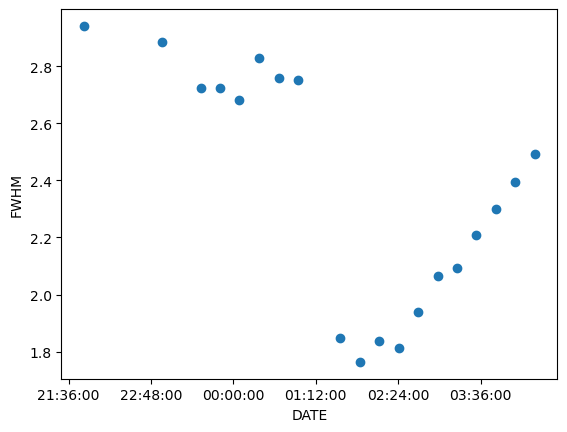

In [60]:
plot_dataframe(df,'DATE','FWHM', is_date=True)

In [ ]:
plot_dataframe(df,'FOCUSPOS','FWHM', rotation=0, is_date=False)